# MARKET BASKET ANALYSIS
**Market basket analysis** es una técnica de extracción de datos utilizada por los retail para aumentar las ventas mediante una mejor comprensión de los patrones de compra de los clientes. Implica analizar grandes conjuntos de datos, como el historial de compras, para revelar grupos de productos, así como productos que probablemente se compren juntos

P.ej. la regla **{pepinos, tomates} -> {aceite de girasol}** encontrada en los datos de ventas de un supermercado indicaría que si un cliente compra pepinos y tomates juntos, es probable que también compre aceite de girasol.

# 1. Importar Libraries


In [1]:
!pip install squarify

In [2]:
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# 2. Lectura de Datos

In [23]:
# leer archivo ('students.csv')
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=",", header = None)

#df = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving 2.1.3 Market_Basket_Optimisation.csv to 2.1.3 Market_Basket_Optimisation (1).csv


In [24]:
df.head(5) # buscando las primeras 5 filas en el conjunto de datos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Visualizando datos
Aquí se decidio contar todos los valores únicos en todas las columnas y crear algunas visualizaciones.
P.ej. si tenemos 5 'almendras' en la primera columna, 3 'almendras' en la segunda columna, etc., tendremos 8 'almendras' en total.

In [29]:
df_res = pd.DataFrame()
for i in range(len(df.columns)):
    # Obtiene el conteo de valores de la columna actual y restablece el índice
    value_counts_df = df[i].value_counts().reset_index()
    # Cambia el nombre de las columnas para mayor claridad
    value_counts_df.columns = ['Value', 'Count']
    # Concatena el conteo de valores al DataFrame de resultados
    df_res = pd.concat([df_res, value_counts_df['Count']], axis=1)

    #df_res = df_res.append(df[i].value_counts())
    #df_res = pd.concat([df_res, df[i].value_counts().reset_index()], axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
df_res.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count,Count
0,577.0,484,375.0,201.0,153.0,107.0,96.0,67.0,57.0,31.0,22.0,15.0,8.0,4.0,3.0,1.0,2.0,2.0,1.0,1.0
1,576.0,411,279.0,181.0,134.0,102.0,81.0,44.0,38.0,19.0,20.0,10.0,6.0,3.0,2.0,1.0,1.0,1.0,1.0,NaN
2,458.0,302,225.0,174.0,130.0,100.0,69.0,43.0,35.0,17.0,14.0,10.0,6.0,3.0,2.0,1.0,1.0,1.0,1.0,NaN


In [8]:
df_res.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(120, 20)

In [11]:
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df_sum

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    7501.0
count    5747.0
count    4389.0
count    3345.0
count    2529.0
count    1864.0
count    1369.0
count     981.0
count     654.0
count     395.0
count     256.0
count     154.0
count      87.0
count      47.0
count      25.0
count       8.0
count       4.0
count       4.0
count       3.0
count       1.0
dtype: float64

Después de contar todos los valores en todas las columnas, podemos construir un **gráfico de frecuencia**.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


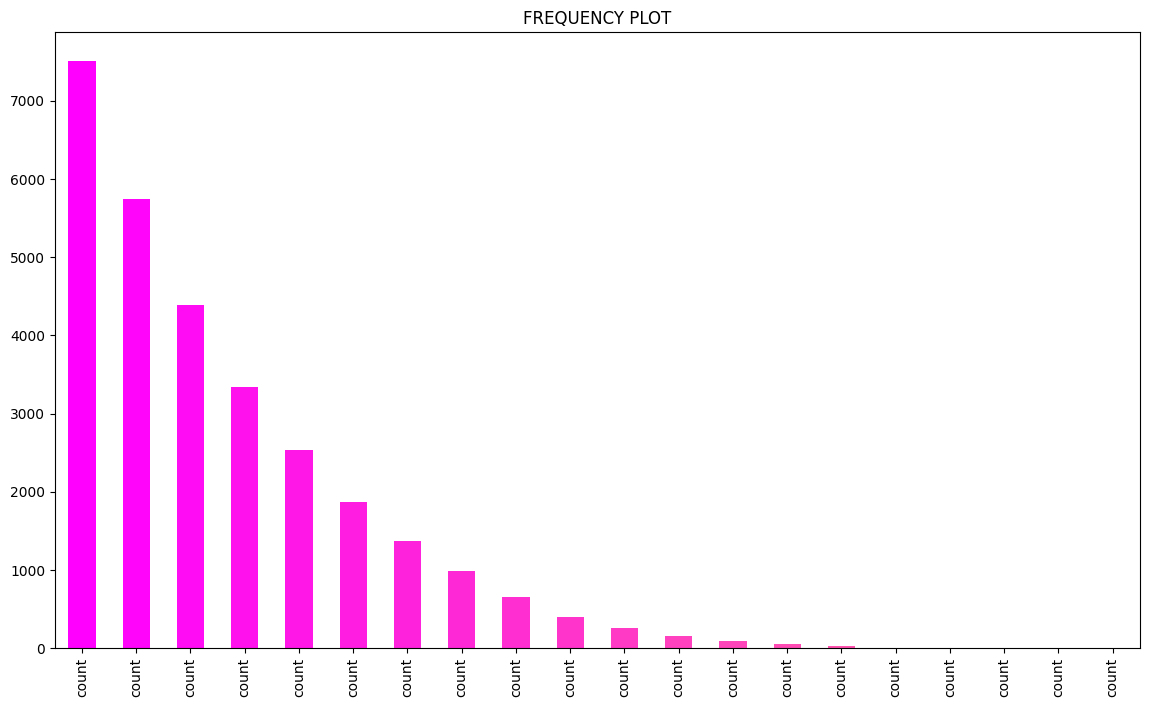

In [13]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

También podemos trazar frecuencias, pero en forma de **mapa de calor**:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


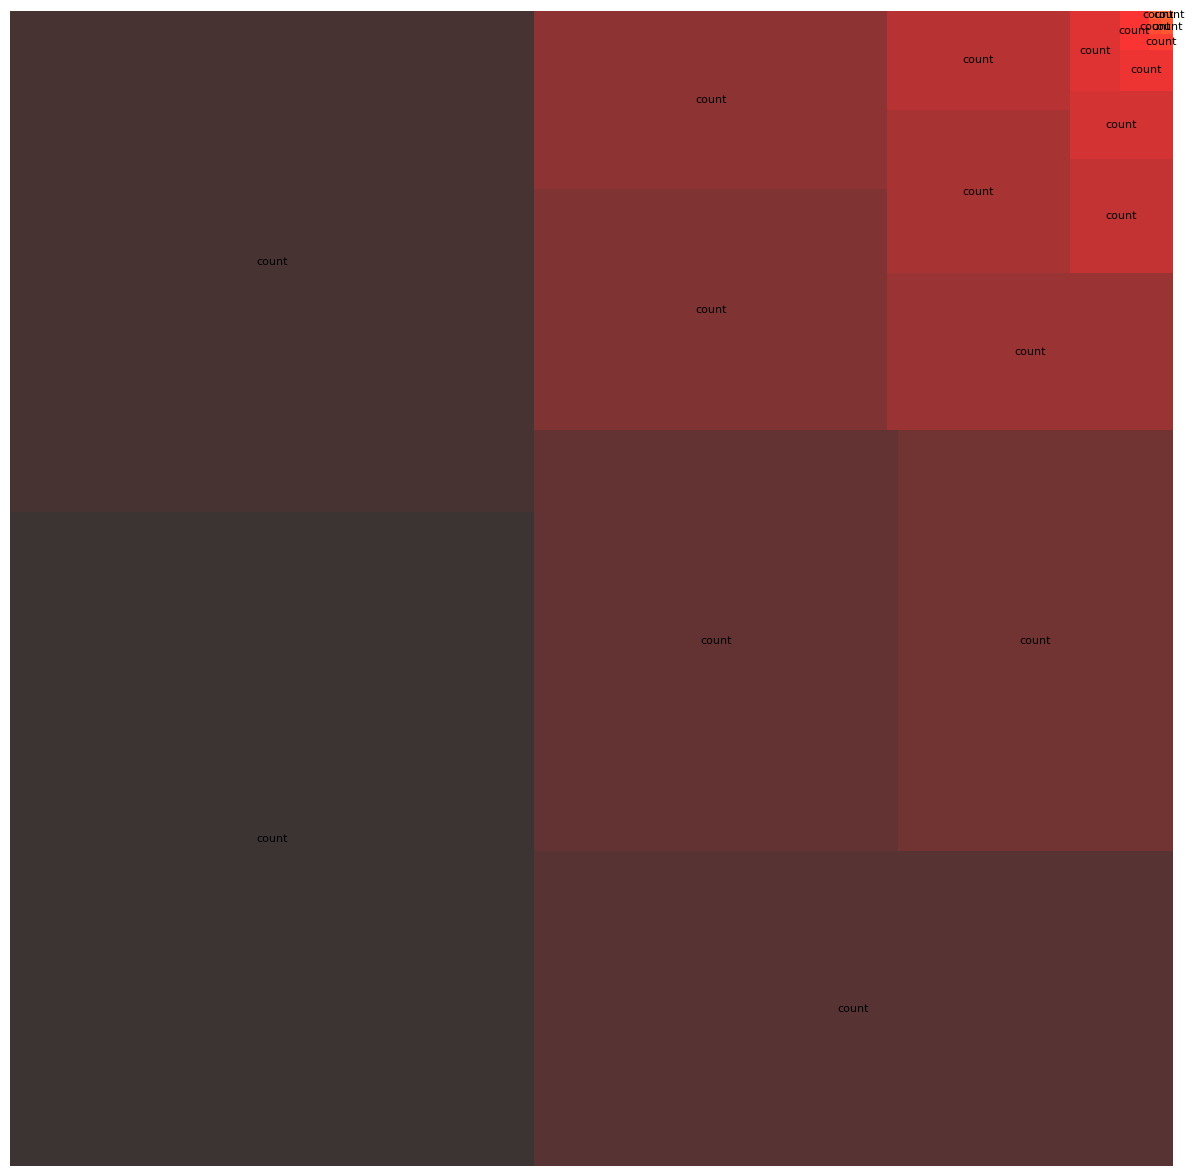

In [14]:
plt.figure(figsize=(15,15))
cnt = 40 # plot only first 'cnt' values
color = plt.cm.hot(np.linspace(0, 1, cnt))
df_part = df_sum.head(cnt)
squarify.plot(sizes = df_part.values, label = df_part.index, alpha=.8, color = color, text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()

# 4. Transformación de datos
Antes de convertir el conjunto de datos a la vista de transacciones, debemos convertir pandas-data en list-data y luego list-data en numpy-data.

In [32]:
# making each customers shopping items an identical list
arr = []
for i in range(df.shape[0]):
    arr.append([str(df.values[i,j]) for j in range(df.shape[1])])

arr = np.array(arr)
print(arr.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 20)


Y ahora podemos convertir nuestro conjunto de datos a **vista de transacciones**.

In [16]:
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)
print(data.shape)

(7501, 121)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Chequeamos los resultados:

In [17]:
data.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Como podemos ver, tenemos **columnas con 'nan' **, por lo que deberíamos eliminarla, porque estos son simplemente valores 'no numéricos', que solo eran celdas vacías en el conjunto de datos original.

In [18]:
data = data.drop(columns=['nan'])
data.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 5. Analizando datos con la regla "apriori"
El algoritmo "apriori" supone que cualquier subconjunto de un conjunto de elementos frecuentes debe ser frecuente. Es el algoritmo detrás del análisis de la cesta de la compra. Digamos que una transacción que contiene {Uvas, Manzana, Mango} también contiene {Uvas, Mango}. Entonces, según el principio de Apriori, si {Uvas, Manzana, Mango} es frecuente, entonces {Uvas, Mango} también debe ser frecuente [[2]](https://www.kdnuggets.com/2019/12/ análisis-de-la-cesta-de-mercado.html).

**Support:** Es la popularidad predeterminada de un artículo. En términos matemáticos, el soporte del elemento A no es más que la relación entre las transacciones que involucran a A y el número total de transacciones.
*Support(Uvas) = (Transacciones que involucran Uvas)/(Transacción total)* [[2]](https://www.kdnuggets.com/2019/12/market-basket-analysis.html).

**Confianza:** Probabilidad de que el cliente haya comprado A y B. Se divide el número de transacciones que involucran a A y B por el número de transacciones que involucran a B.
*Confianza(A => B) = (Transacciones que involucran tanto a A como a B)/(Transacciones que involucran solo a A)* [[2]](https://www.kdnuggets.com/2019/12/market-basket-analysis .html).

Entonces, ahora usaremos la **regla a priori** para encontrar algunas dependencias. [Aquí](http://rasbt.github.io/mlxtend/api_modules/mlxtend.frequent_patterns/apriori/) puedes leer más al respecto.

In [19]:
freq_rules = apriori(data, min_support = 0.01, use_colnames = True)
freq_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, mineral water, milk)"
253,0.017064,"(ground beef, mineral water, spaghetti)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(mineral water, spaghetti, olive oil)"


Entonces, aquí podemos ver todas las reglas que tienen un soporte mínimo de 0,01.
Si necesitas **reglas con cierta longitud**, podemos filtrar los resultados:

In [20]:
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x)) # adding 'length' column
freq_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(ground beef, mineral water, milk)",3
253,0.017064,"(ground beef, mineral water, spaghetti)",3
254,0.015731,"(mineral water, spaghetti, milk)",3
255,0.010265,"(mineral water, spaghetti, olive oil)",3


In [21]:
mask = freq_rules['length'] > 1 # creando una máscara para filtrar con cierta condición
filtered_freq_rules = freq_rules.loc[mask] # aplicando la máscara
filtered_freq_rules # imprimiendo el resultado filtrado

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
75,0.011598,"(avocado, mineral water)",2
76,0.011465,"(burgers, cake)",2
77,0.017064,"(burgers, chocolate)",2
78,0.028796,"(burgers, eggs)",2
79,0.021997,"(french fries, burgers)",2
...,...,...,...
252,0.011065,"(ground beef, mineral water, milk)",3
253,0.017064,"(ground beef, mineral water, spaghetti)",3
254,0.015731,"(mineral water, spaghetti, milk)",3
255,0.010265,"(mineral water, spaghetti, olive oil)",3


Entonces, al final podemos ver todas las reglas, que tienen cierta longitud y que tienen cierto soporte mínimo.

# 6. Conclusión
Cada vez más organizaciones están descubriendo formas de utilizar el análisis de la cesta de la compra para obtener información útil sobre asociaciones y relaciones ocultas.


